# CAPSTONE PROJECT BENGKEL KODING


*   NAMA : AFRIZAL MUKTI PRAMUTIANSYAH
*   NIM  : A11.2019.11893




In [ ]:
!gdown 1sjHPXLPk-KV4H1eHGegeAKxA-iui8cuO

Downloading...
From: https://drive.google.com/uc?id=1sjHPXLPk-KV4H1eHGegeAKxA-iui8cuO
To: /content/processed.hungarian.data
100% 10.3k/10.3k [00:00<00:00, 24.4MB/s]


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

# Untuk Balance Data
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Random Forest, XGBoost dan Logistic Regression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

In [ ]:
with open ('/content/processed.hungarian.data', 'r') as file:
  data = file.read()

In [ ]:
df = pd.read_csv('/content/processed.hungarian.data', header = None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


# DATA PREPARATION

In [ ]:
#rename columns sesuai heart disease UCI
df = df.rename(columns={
    0: 'Age',
    1: 'Sex',
    2: 'cp',
    3: 'trestbps',
    4: 'chol',
    5: 'fbs',
    6: 'restecg',
    7: 'thalach',
    8: 'exang',
    9: 'oldpeak',
    10: 'slope',
    11: 'ca',
    12: 'thal',
    13: 'num'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       294 non-null    int64  
 1   Sex       294 non-null    int64  
 2   cp        294 non-null    int64  
 3   trestbps  294 non-null    object 
 4   chol      294 non-null    object 
 5   fbs       294 non-null    object 
 6   restecg   294 non-null    object 
 7   thalach   294 non-null    object 
 8   exang     294 non-null    object 
 9   oldpeak   294 non-null    float64
 10  slope     294 non-null    object 
 11  ca        294 non-null    object 
 12  thal      294 non-null    object 
 13  num       294 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 32.3+ KB


In [ ]:
#merubah value ? menjadi NaN
df.replace('?', pd.NaT, inplace=True)
df.isnull().mean()*100

Age          0.000000
Sex          0.000000
cp           0.000000
trestbps     0.340136
chol         7.823129
fbs          2.721088
restecg      0.340136
thalach      0.340136
exang        0.340136
oldpeak      0.000000
slope       64.625850
ca          98.979592
thal        90.476190
num          0.000000
dtype: float64

In [ ]:
df.dropna(subset=['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang'], inplace = True)

In [ ]:
df.isnull().mean()*100

Age          0.000000
Sex          0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
fbs          0.000000
restecg      0.000000
thalach      0.000000
exang        0.000000
oldpeak      0.000000
slope       63.601533
ca          99.233716
thal        90.421456
num          0.000000
dtype: float64

In [ ]:
#hapus kolom yang memiliki persentase missing values diatas 60%
df.drop(columns=['slope', 'thal', 'ca'], inplace=True)

In [ ]:
#cek duplicate value
df.duplicated().sum()

0

In [ ]:
df.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0
5,32,0,2,105,198,0,0,165,0,0.0,0


In [ ]:
columns = df.select_dtypes('object').columns.to_list()

columns

['trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang']

In [ ]:
df[columns] = df[columns].astype('int')

<Axes: >

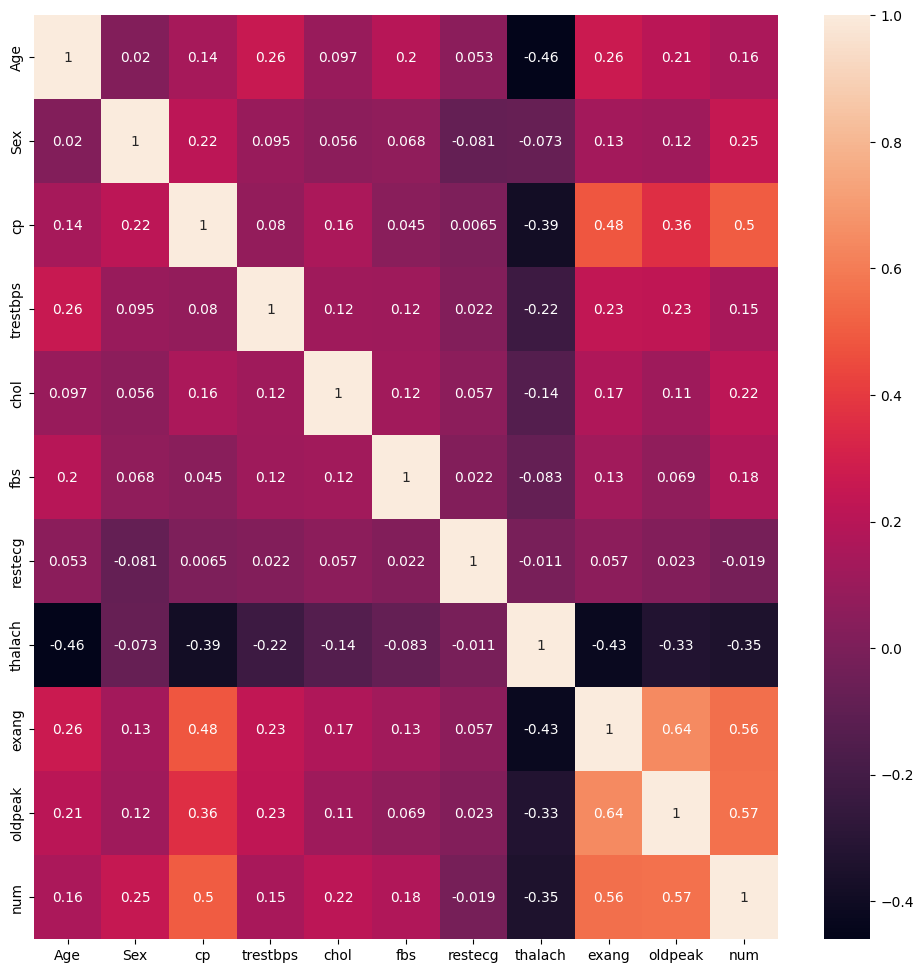

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       261 non-null    int64  
 1   Sex       261 non-null    int64  
 2   cp        261 non-null    int64  
 3   trestbps  261 non-null    int64  
 4   chol      261 non-null    int64  
 5   fbs       261 non-null    int64  
 6   restecg   261 non-null    int64  
 7   thalach   261 non-null    int64  
 8   exang     261 non-null    int64  
 9   oldpeak   261 non-null    float64
 10  num       261 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 24.5 KB


<Axes: xlabel='num', ylabel='Count'>

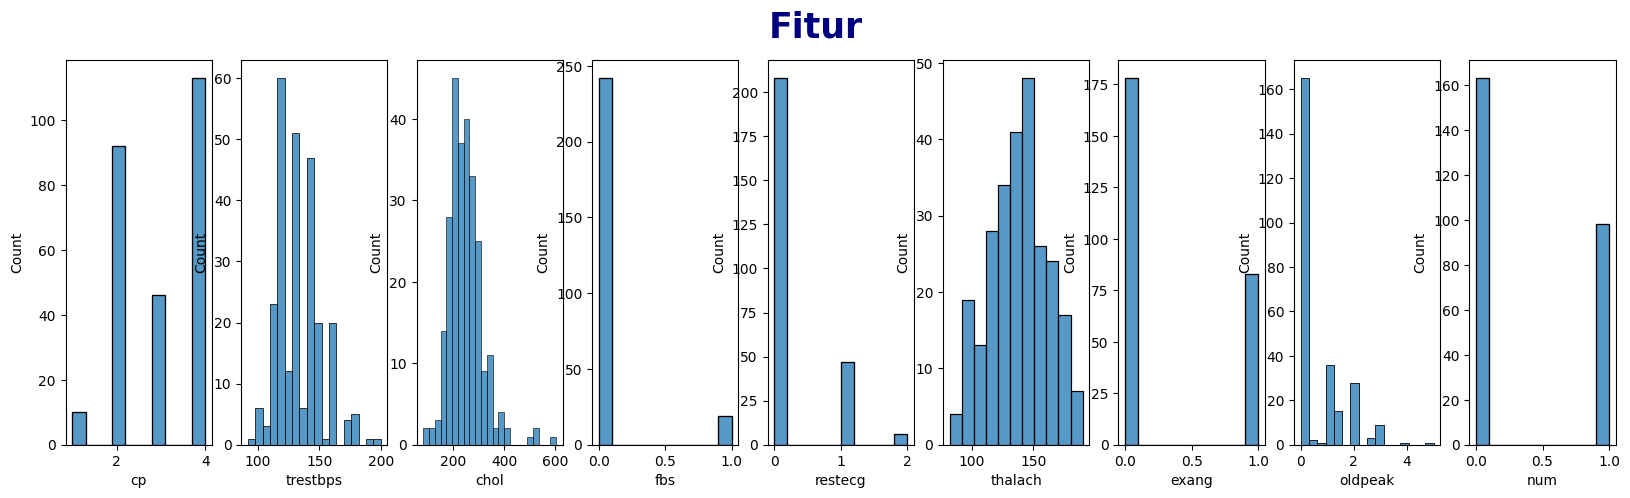

In [ ]:
fig, axes = plt.subplots(1, 9, figsize=(20, 5))
plt.suptitle('Fitur', fontsize=25, fontweight='bold', color='navy')

# axis 1
sns.histplot(data=df, x='cp', ax=axes[0])

# axis 2
sns.histplot(data=df, x='trestbps', ax=axes[1])

# axis 3
sns.histplot(data=df, x='chol', ax=axes[2])

# axis 4
sns.histplot(data=df, x='fbs', ax=axes[3])

# axis 5
sns.histplot(data=df, x='restecg', ax=axes[4])

# axis 6
sns.histplot(data=df, x='thalach', ax=axes[5])

# axis 7
sns.histplot(data=df, x='exang', ax=axes[6])

# axis 8
sns.histplot(data=df, x='oldpeak', ax=axes[7])

# axis 9
sns.histplot(data=df, x='num', ax=axes[8])

In [ ]:
#SAVE DATA CLEAN
df.to_csv('data_clean.csv', index=False)

# Data Modelling



In [ ]:
df.shape

(261, 11)

In [ ]:
# Bagi training dan test 70 30

X = df.iloc[:, :-1]
y = df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [ ]:
classifiers = {
    "Random Forest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier(),
    "Logistic Regression" : LogisticRegression()
}

In [ ]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
  classifier.fit(X_train, y_train)
  train_score = classifier.score(X_train, y_train)
  train_scores.append(train_score)
  test_score = classifier.score(X_test, y_test)
  test_scores.append(test_score)

print(train_scores)
print(test_scores)

[1.0, 1.0, 0.8247863247863247]
[0.9629629629629629, 0.8888888888888888, 0.9259259259259259]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
cl = ['Random Forest', 'XGBoost', 'Logistic Regression']

In [ ]:
predict = pd.DataFrame({"Method":cl, "Score Train":train_scores, "Score Test":test_scores})
predict

,Method,Score Train,Score Test
0,Random Forest,1.000000,0.962963
1,XGBoost,1.000000,0.888889
2,Logistic Regression,0.824786,0.925926


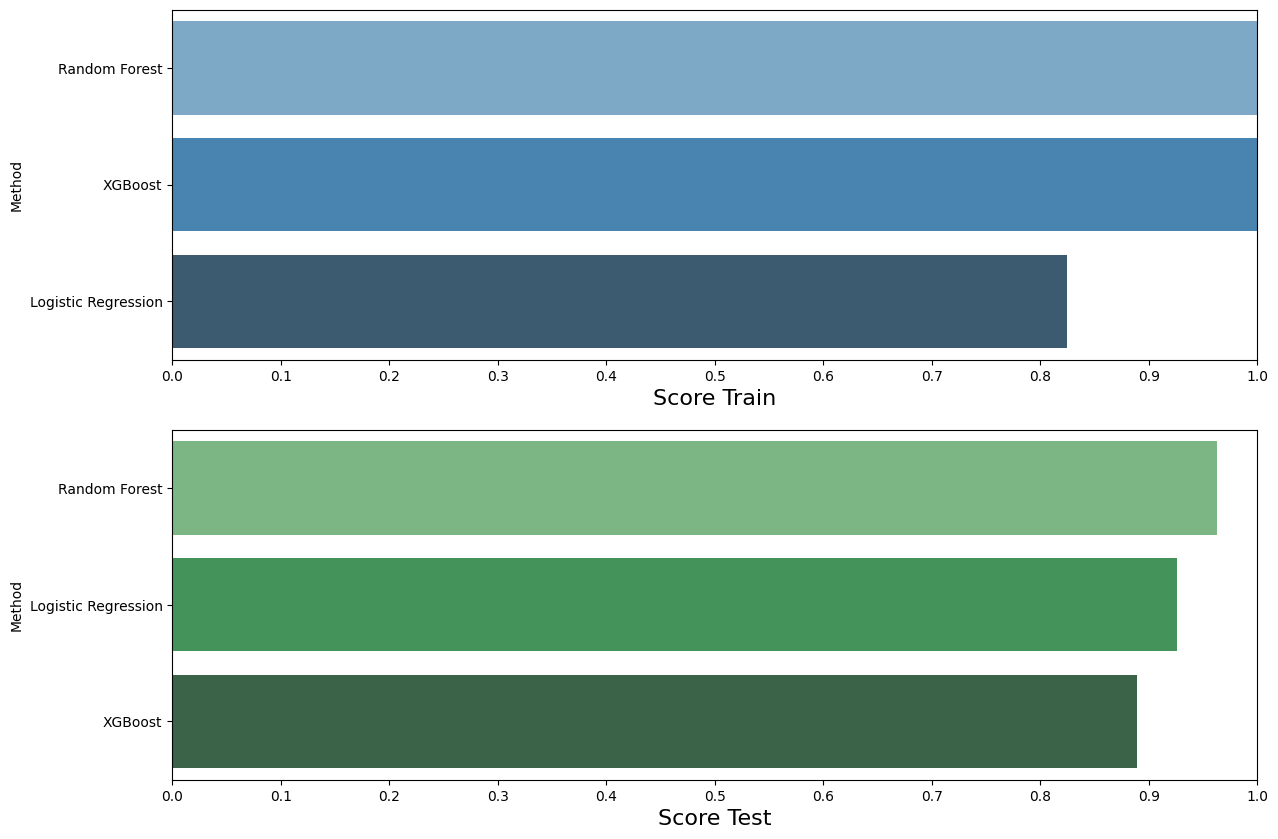

In [ ]:
# Visualsasi perbandingan model

f, axes = plt.subplots(2, 1, figsize=(14, 10))

predict.sort_values(by=['Score Train'], ascending=False, inplace=True)

sns.barplot(x="Score Train", y="Method", data = predict, palette='Blues_d', ax=axes[0])
# axes[0].set(xlabel="Region", ylabel='Charges')
axes[0].set_xlabel("Score Train", size=16)
axes[0].set_ylabel=('Method')
axes[0].set_xlim(0, 1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Score Test'], ascending=False, inplace=True)

sns.barplot(x="Score Test", y="Method", data = predict, palette='Greens_d', ax=axes[1])
# axes[0].set(xlabel="Region", ylabel='Charges')
axes[1].set_xlabel("Score Test", size=16)
axes[1].set_ylabel('Method')
axes[1].set_xlim(0, 1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()

# KESIMPULAN

Dari 3 algoritma klasifikasi diatas, model algoritma terbaik yang digunakan untuk hungarian dataset adalah Random Forest.